# Author - Gulipelli Rohan Kumar

# Profile - Data Science and Business Analytics

# From - The Sparks Foundation

# Email - rohankumar5685@gmail.com

# Phone No - 7656867798

# Task 1 - Prediction using supervised ML

OBJECTIVE - Predict the percentage of a student based on the no. of study hours. What will be the predicted score if a student studies for 9.25 hrs/ day?

Simple Linear Regression:
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables

# Importing the dependencies

In [1]:
#importing all the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading and observing the data

In [2]:
#Loading the dataset from the given url
df = "http://bit.ly/w-data"
df = pd.read_csv(df)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Plotting our data points to see whether any insights can be drawn manually

Text(0, 0.5, 'Scores')

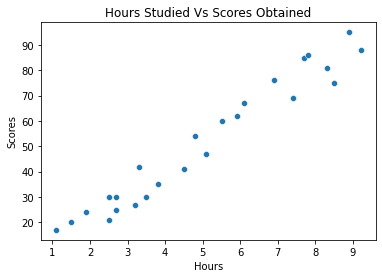

In [9]:
#Plotting hours studies vs scores obtained to understand the relationship between them
sns.scatterplot(x = 'Hours', y = 'Scores', data = df)
plt.title("Hours Studied Vs Scores Obtained")
plt.xlabel("Hours")
plt.ylabel("Scores")


From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and score obtained.


# Preparing the Attributes and Labels

In [11]:
#Dividing the data into "attributes" (input) and "lables" (output)
x = df.iloc[:,:-1].values #independent variable 
y = df.iloc[:,1].values  #dependent variable

# Splitting the data into Training and Test sets

In [12]:
#spliting the data into traning and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=101)

# Training the Algorithm

In [14]:
#Importing the Linear regression Model and training the model on training data by calling fit method
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(x_train,y_train)

# Visualizing the Training data using Regplot

Text(0, 0.5, 'Percentage Scored')

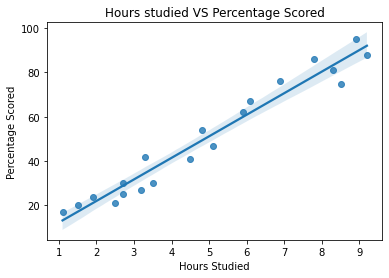

In [19]:
sns.regplot(x_train, y_train)
plt.title('Hours studied VS Percentage Scored')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

# Visualizing the Testing data

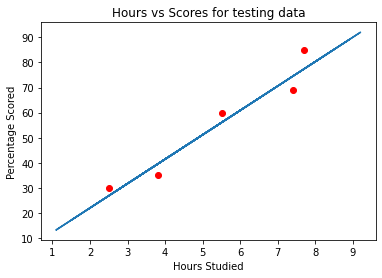

In [22]:
plt.scatter(x_test,y_test,color="r")
plt.plot(x_train,reg.predict(x_train))
plt.title('Hours vs Scores for testing data')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

# Making Predictions

In [23]:
#Predicting the scores
y_predict=reg.predict(x_test)
y_predict

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

In [25]:
#Comparing Actual vs Predicted
my_dict={'Actual': y_test, 
         'Predicted':y_predict
        }
df1 = pd.DataFrame(my_dict)  
df1

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


In [26]:
#Testing for the given data
hrs = 9.25
predict = reg.predict([[hrs]])
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(predict[0]))

No of Hours = 9.25
Predicted Score = 92.54521954029961


Score obtained by the student if he studies for 9.25 hours per day = 92.54521954029961


# Evaluating the model

In [27]:
#calculating the Mean Absolute Error (MAE),Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
from sklearn import metrics
print("MAE=",metrics.mean_absolute_error(y_test,y_predict))
print("MSE=",metrics.mean_squared_error(y_test,y_predict))
print("RMSE=",np.sqrt(metrics.mean_absolute_error(y_test,y_predict)))

MAE= 4.937597792467706
MSE= 26.67564259705224
RMSE= 2.2220706092443834


In [28]:
#r_score calculation
from sklearn import metrics
print(metrics.r2_score(y_predict,y_test))

0.9305370616360136


r_score is correlation coefficient in the regression it is always less than 1 if r2_score>>>0.70 our model is optimum and good
